Copyright (C) 2017 The HDF Group

This example code illustrates how to access and visualize a GESDISC AIRS swath
in Python.

If you have any questions, suggestions, or comments on this example, please use
the HDF-EOS Forum (http://hdfeos.org/forums).  If you would like to see an
example of any other NASA HDF/HDF-EOS data product that is not listed in the
HDF-EOS Comprehensive Examples page (http://hdfeos.org/zoo), feel free to
contact us at eoshelp@hdfgroup.org or post it at the HDF-EOS Forum
(http://hdfeos.org/forums).

Usage:  save this script and run

    python AIRH2RET.py

The HDF file must be searchable by CMR and served by OPeNDAP server.

Tested under: Python 2.7.10 :: Anaconda 2.3.0 (x86_64)
Last updated: 2017-1-05

# Access AIRS data from GES DISC via OPeNDAP using CMR search result

In [1]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset    

Please download and install PyCMR from https://github.com/hdfeos/cmr

In [2]:
from pyCMR import CMR
# Change path to the sample cmr.cfg file.
cmr=CMR("/Users/hyoklee/cmr/cmr.cfg")
# AIRS granule search doesn't return OPeNDAP URL.
# Retrieve the latest dataset using sort key.
results_g = cmr.searchGranule(limit=1,short_name="AIRH2RET",sort_key='-start_date')
# Collection does return OPeNDAP URL.
results = cmr.searchCollection(limit=1,short_name="AIRH2RET")

Let's check CMR results.

In [3]:
print len(results)
for res in results:
    # Check OPeNDAP URL.
    print  res.getOPeNDAPUrl()    

print len(results_g)
ourl = ''
for res in results_g:
    # Check Granule Data URL.
    print res.getDownloadUrl()
    ourl = res.getDownloadUrl()

1
http://airsl2.gesdisc.eosdis.nasa.gov/opendap/Aqua_AIRS_Level2/AIRH2RET.006/contents.html
1
http://airsl2.gesdisc.eosdis.nasa.gov/data/Aqua_AIRS_Level2/AIRH2RET.006/2003/036/AIRS.2003.02.05.238.L2.RetStd_H.v6.0.12.0.G14109025541.hdf


As you can see from the above output, for GES_DISC AIRS, the download URL matches OPeNDAP URL except '/data/' and '/opendap/'. Let's replace it.

In [4]:
FILE_NAME = ourl.replace("data", "opendap")
print FILE_NAME


http://airsl2.gesdisc.eosdis.nasa.gov/opendap/Aqua_AIRS_Level2/AIRH2RET.006/2003/036/AIRS.2003.02.05.238.L2.RetStd_H.v6.0.12.0.G14109025541.hdf


The rest is same as http://hdfeos.org/zoo/GESDISC/AIRS.2002.08.30.227.L2.RetStd_H.v6.0.12.0.G14101125810.hdf.py example.

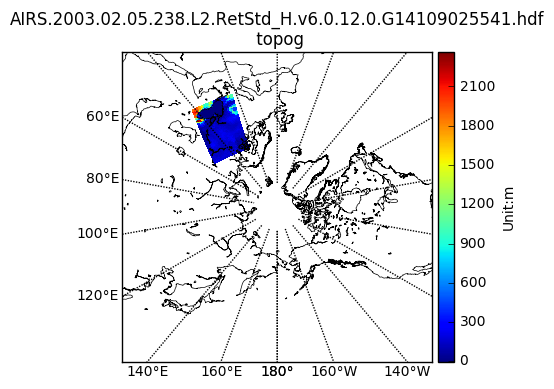

In [5]:
DATAFIELD_NAME = 'topog'
nc = Dataset(FILE_NAME)
data = nc.variables[DATAFIELD_NAME][:,:]
latitude = nc.variables['Latitude'][:]
longitude = nc.variables['Longitude'][:]

# Replace the filled value with NaN, replace with a masked array.
data[data == -9999.0] = np.nan
datam = np.ma.masked_array(data, np.isnan(data))
    
# Draw a polar stereographic projection using the low resolution coastline
# database.
m = Basemap(projection='npstere', resolution='l',
            boundinglat=30, lon_0 = 180)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(-80., -50., 5.))
m.drawmeridians(np.arange(-180., 181., 20.), labels=[1, 0, 0, 1])
x, y = m(longitude, latitude)
m.pcolormesh(x, y, datam)

# See AIRS/AMSU/HSB Version 6 Level 2 Product User Guide [1]
units = 'm'
cb = m.colorbar()
cb.set_label('Unit:'+units)
    
basename = os.path.basename(FILE_NAME)
plt.title('{0}\n {1}'.format(basename, DATAFIELD_NAME))
fig = plt.gcf()
plt.show()
pngfile = "{0}.py.png".format(basename)
fig.savefig(pngfile)

# References
# [1] https://disc.gsfc.nasa.gov/AIRS/documentation/v6_docs/v6releasedocs-1/V6_L2_Product_User_Guide.pdf